In [40]:
%cd E:\M.tech\semester 3\NMCL\Assignments\Assignment 3\plots

E:\M.tech\semester 3\NMCL\Assignments\Assignment 3\plots


In [41]:
from pylab import *
import numpy as np

# Question 1 Shallow water

# first order Roe solver

In [42]:
imax=101
time=0.5

In [43]:

CFL=0.8
x_l=-5
x_r=5
hl=3
hr=1
ul=0
ur=0
g=1
dx=abs(x_l-x_r)/(imax-1)
X=np.zeros(imax)
h_in=np.zeros(imax)
u_in=np.zeros(imax)
h_u_in=np.zeros(imax)

u=np.zeros((imax,2))
h=np.zeros((imax,2))
hu=np.zeros((imax,2))

u_plt1=np.zeros((imax,2))
h_plt1=np.zeros((imax,2))
hu_plt1=np.zeros((imax,2))

X[-1]=-5.1
for i in range (imax):
  X[i]=x_l+i*dx
  if (X[i]<0):
    h_in[i]=hl
    u_in[i]=ul
    h_u_in[i]=hl*ul
  else :
    h_in[i]=hr
    u_in[i]=ur
    h_u_in[i]=hr*ur

h[:,0]=h_in
u[:,0]=u_in
hu[:,0]=h_u_in

t=0
while t<time:
  # left B C's
  
  u[0][1]=u_in[0]
  h[0][1]= h_in[0]
  hu[0][1]=h_u_in[0]

  

  h[imax-1][1]=h_in[imax-1]
  u[imax-1][1]=u_in[imax-1]
  hu[imax-1][1]=h_u_in[imax-1]

  lam_p=[]
  lam_n=[]
  for i in range (1,imax-1):
    
    u_b_n = (sqrt(h[i-1][0])*u[i-1][0] + sqrt(h[i][0])*u[i][0]) / (sqrt(h[i-1][0])+sqrt(h[i][0]))

    h_b_n = 0.5*(h[i-1][0]+h[i][0])

    u_b_p =  (sqrt(h[i+1][0])*u[i+1][0] + sqrt(h[i][0])*u[i][0]) / (sqrt(h[i+1][0])+sqrt(h[i][0]))

    h_b_p = 0.5*( h[i+1][0]+h[i][0] )

    lam_1_p = u_b_p - sqrt(g*h_b_p)
    lam_2_p = u_b_p + sqrt(g*h_b_p)
    
    lam_1_n = u_b_n - sqrt(g*h_b_n)
    lam_2_n = u_b_n + sqrt(g*h_b_n)
    

    lam_p.append(max( abs(lam_1_p) ,abs(lam_2_p) ) )
    lam_n.append( max( abs(lam_1_n) ,abs(lam_2_n) ) )
   

  lam_max=max(max(lam_p) , max(lam_n))
 
  
  dt= CFL*dx/lam_max

  t+=dt
  
  
  R_cap_p=np.zeros((2,2))
  R_cap_n=zeros((2,2))
  

  for i in range (1,imax-1):
    u_b_n = (sqrt(h[i-1][0])*u[i-1][0] + sqrt(h[i][0])*u[i][0]) / (sqrt(h[i-1][0])+sqrt(h[i][0]))

    h_b_n = 0.5*(h[i-1][0]+h[i][0])

    u_b_p =  (sqrt(h[i+1][0])*u[i+1][0] + sqrt(h[i][0])*u[i][0]) / (sqrt(h[i+1][0])+sqrt(h[i][0]))

    h_b_p = 0.5*( h[i+1][0]+h[i][0] )

    r11p = 1
    r21p = u_b_p - sqrt(g*h_b_p)
   

    r12p = 1
    r22p = u_b_p +sqrt(g*h_b_p)
   

    R_cap_p =([ [r11p,r12p] , [r21p,r22p] ])

    r11n = 1
    r21n = u_b_n - sqrt(g*h_b_n)
   

    r12n = 1
    r22n = u_b_n + sqrt(g*h_b_n)
    
    R_cap_n =([ [r11n,r12n] , [r21n,r22n]])

    f1pv = h[i+1][0] - h[i][0]
    f2pv = hu[i+1][0] - hu[i][0]

    F_p = np.array( [ [f1pv], [f2pv] ] )

    f1nv = h[i][0] - h[i-1][0]
    f2nv = hu[i][0] - hu[i-1][0]

    F_n =np.array( [ [f1nv], [f2nv] ] )

    al1p,al2p = np.linalg.solve(R_cap_p, F_p) 

    al1n,al2n = np.linalg.solve(R_cap_n, F_n)

    a1p=abs(u_b_p - sqrt(g*h_b_p))*al1p*r11p
    a2p=abs(u_b_p +sqrt(g*h_b_p))*al2p*r12p

    b1p=abs(u_b_p - sqrt(g*h_b_p))*al1p*r21p
    b2p=abs(u_b_p +sqrt(g*h_b_p))*al2p*r22p

    df1p=a1p+a2p
    df2p=b1p+b2p

   
    a1n=abs(u_b_n - sqrt(g*h_b_n))*al1n*r11n
    a2n=abs(u_b_n + sqrt(g*h_b_n))*al2n*r12n

    b1n=abs(u_b_n - sqrt(g*h_b_n))*al1n*r21n
    b2n=abs(u_b_n + sqrt(g*h_b_n))*al2n*r22n

    df1n=a1n+a2n
    df2n=b1n+b2n


    f1lp = hu[i][0]
    f2lp = h[i][0]*u[i][0]**2 + (0.5*g*h[i][0]**2)
    

    f1rp = hu[i+1][0]
    f2rp = h[i+1][0]*u[i+1][0]**2 + (0.5*g*h[i+1][0]**2)
    
    f1rn = hu[i][0]
    f2rn = h[i][0]*u[i][0]**2 + (0.5*g*h[i][0]**2)
    

    f1ln = hu[i-1][0]
    f2ln = h[i-1][0]*u[i-1][0]**2 + (0.5*g*h[i-1][0]**2)
    
    f1p = 0.5*(f1lp+f1rp) - 0.5*(df1p)
    f2p = 0.5*(f2lp+f2rp) - 0.5*(df2p)
    

    f1n = 0.5*(f1ln+f1rn)  - 0.5*(df1n)
    f2n = 0.5*(f2ln+f2rn) - 0.5*(df2n)
    
    

    h_up  = h[i][0] -  (dt/dx)*(f1p-f1n)
    hu_up = hu[i][0] - (dt/dx)*(f2p-f2n)
    u_up = (hu_up/h_up)
    
    
    u[i][1] = u_up
    hu[i][1] = hu_up
    h[i][1] = h_up

  u[:,0] =u[:,1]
  h[:,0] = h[:,1]
  hu[:,0] = hu[:,1]

u_plt1[:,0]=u[:,0]
h_plt1[:,0]=h[:,0]
hu_plt1[:,0]=hu[:,0]



# Second-order flux difference splitting

In [44]:
CFL=0.8
x_l=-5
x_r=5
hl=3
hr=1
ul=0
ur=0
g=1
dx=abs(x_l-x_r)/(imax-1)
X=np.zeros(imax)
h_in=np.zeros(imax)
u_in=np.zeros(imax)
h_u_in=np.zeros(imax)

u=np.zeros((imax,2))
h=np.zeros((imax,2))
hu=np.zeros((imax,2))

u_plt2=np.zeros((imax,2))
h_plt2=np.zeros((imax,2))
hu_plt2=np.zeros((imax,2))

X[-1]=-5.1
for i in range (imax):
  X[i]=x_l+i*dx
  if (X[i]<0):
    h_in[i]=hl
    u_in[i]=ul
    h_u_in[i]=hl*ul
  else :
    h_in[i]=hr
    u_in[i]=ur
    h_u_in[i]=hr*ur

h[:,0]=h_in
u[:,0]=u_in
hu[:,0]=h_u_in

t=0
while t<time:
  # left B C's
  
  u[0][1]=u_in[0]
  h[0][1]= h_in[0]
  hu[0][1]=h_u_in[0]

  #right B C's

  h[imax-1][1]=h_in[imax-1]
  u[imax-1][1]=u_in[imax-1]
  hu[imax-1][1]=h_u_in[imax-1]

  lam_p=[]
  lam_n=[]
  for i in range (1,imax-1):
    
    u_b_n = (sqrt(h[i-1][0])*u[i-1][0] + sqrt(h[i][0])*u[i][0]) / (sqrt(h[i-1][0])+sqrt(h[i][0]))

    h_b_n = 0.5*(h[i-1][0]+h[i][0])

    u_b_p =  (sqrt(h[i+1][0])*u[i+1][0] + sqrt(h[i][0])*u[i][0]) / (sqrt(h[i+1][0])+sqrt(h[i][0]))

    h_b_p = 0.5*( h[i+1][0]+h[i][0] )

    lam_1_p = u_b_p - sqrt(g*h_b_p)
    lam_2_p = u_b_p + sqrt(g*h_b_p)
    
    lam_1_n = u_b_n - sqrt(g*h_b_n)
    lam_2_n = u_b_n + sqrt(g*h_b_n)
    

    lam_p.append(max( abs(lam_1_p) ,abs(lam_2_p) ) )
    lam_n.append( max( abs(lam_1_n) ,abs(lam_2_n) ) )
   

  lam_max=max(max(lam_p) , max(lam_n))
   
  dt= CFL*dx/lam_max
 
  t+=dt
  
  
  R_cap_p=np.zeros((2,2))
  R_cap_n=zeros((2,2))
  

  for i in range (1,imax-1):
    u_b_n = (sqrt(h[i-1][0])*u[i-1][0] + sqrt(h[i][0])*u[i][0]) / (sqrt(h[i-1][0])+sqrt(h[i][0]))

    h_b_n = 0.5*(h[i-1][0]+h[i][0])

    u_b_p =  (sqrt(h[i+1][0])*u[i+1][0] + sqrt(h[i][0])*u[i][0]) / (sqrt(h[i+1][0])+sqrt(h[i][0]))

    h_b_p = 0.5*( h[i+1][0]+h[i][0] )

    r11p = 1
    r21p = u_b_p - sqrt(g*h_b_p)
   

    r12p = 1
    r22p = u_b_p +sqrt(g*h_b_p)
   

    R_cap_p =([ [r11p,r12p] , [r21p,r22p] ])

    r11n = 1
    r21n = u_b_n - sqrt(g*h_b_n)
   

    r12n = 1
    r22n = u_b_n + sqrt(g*h_b_n)
    
    R_cap_n =([ [r11n,r12n] , [r21n,r22n]])

    f1pv = h[i+1][0] - h[i][0]
    f2pv = hu[i+1][0] - hu[i][0]

    F_p = np.array( [ [f1pv], [f2pv] ] )

    f1nv = h[i][0] - h[i-1][0]
    f2nv = hu[i][0] - hu[i-1][0]

    F_n =np.array( [ [f1nv], [f2nv] ] )

    al1p,al2p = np.linalg.solve(R_cap_p, F_p) 

    al1n,al2n = np.linalg.solve(R_cap_n, F_n)

    df1p=((r21p*0.5*(1-(dt/dx)*r21p))*al1p*r11p) + ((r22p*0.5*(1-(dt/dx)*r22p))*al2p*r12p)  
    df2p=((r21p*0.5*(1-(dt/dx)*r21p))*al1p*r21p) + ((r22p*0.5*(1-(dt/dx)*r22p))*al2p*r22p)  

    df1n=((r21n*0.5*(1+(dt/dx)*r21n))*al1n*r11n) + ((r22n*0.5*(1+(dt/dx)*r22n))*al2n*r12n)   
    df2n=((r21n*0.5*(1+(dt/dx)*r21n))*al1n*r21n) + ((r22n*0.5*(1+(dt/dx)*r22n))*al2n*r22n)  

    h_up  = h[i][0] -  (dt/dx)*(df1p+df1n)
    hu_up = hu[i][0] - (dt/dx)*(df2p+df2n)
    u_up = (hu_up/h_up)
    
    
    u[i][1] = u_up
    hu[i][1] = hu_up
    h[i][1] = h_up
    

 
  u[:,0] =u[:,1]
  h[:,0] = h[:,1]
  hu[:,0] = hu[:,1]

u_plt2[:,0]=u[:,0]
h_plt2[:,0]=h[:,0]
hu_plt2[:,0]=hu[:,0]

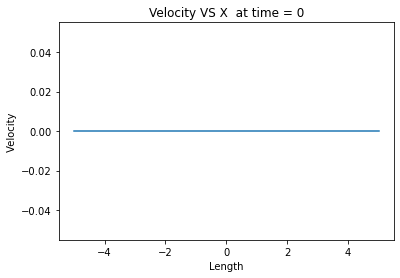

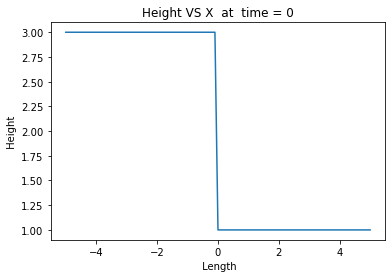

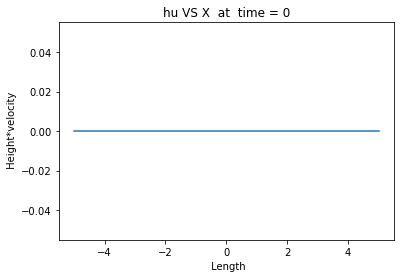

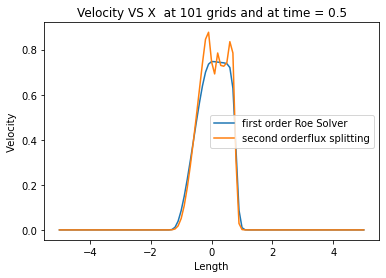

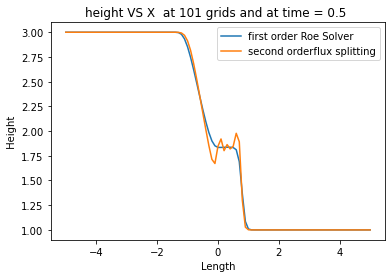

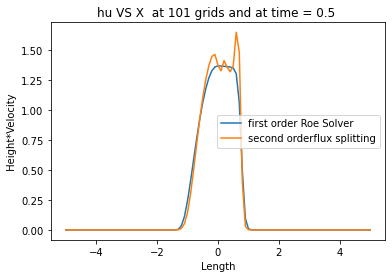

In [45]:

figure(1)
plt.title("Velocity VS X  at time = 0" ) 
plot(X,u_in)
xlabel("Length") 
ylabel(" Velocity ")
savefig("Velocity VS X at time = 0" )

figure(2)
title("Height VS X  at  time = 0" ) 
plot(X,h_in)
xlabel(" Length") 
ylabel(" Height ")
savefig("Height VS X  at  time = 0")

figure(3)
plt.title("hu VS X  at  time = 0" ) 
plot(X,h_u_in)
xlabel(" Length") 
ylabel(" Height*velocity")
savefig("hu VS X  at time = 0" )

figure(4)
plt.title("Velocity VS X  at {} grids and at time = {}" .format(round(imax,3),round(time,3))) 
plot(X,u_plt1[:,0])
plot(X,u_plt2[:,0])
xlabel("Length") 
ylabel(" Velocity ")
legend(["first order Roe Solver","second orderflux splitting"])
savefig("Velocity VS X  at {} grids and at time = {} .png" .format(round(imax,3),round(time,3)))

figure(5)
plt.title("height VS X  at {} grids and at time = {} " .format(round(imax,3),round(time,3))) 
plot(X,h_plt1[:,0])
plot(X,h_plt2[:,0])
xlabel("Length") 
ylabel(" Height ")
legend(["first order Roe Solver","second orderflux splitting"])
savefig("height VS X  at {} grids and at time = {} .png" .format(round(imax,3),round(time,3)))

figure(6)
plt.title("hu VS X  at {} grids and at time = {} " .format(round(imax,3),round(time,3))) 
plot(X,hu_plt1[:,0])
plot(X,hu_plt2[:,0])
xlabel("Length") 
ylabel(" Height*Velocity ")
legend(["first order Roe Solver","second orderflux splitting"])
savefig("hu VS X  at {} grids and at time = {} .png" .format(round(imax,3),round(time,3)))

# Question 2

# first order Roe solver


In [46]:
imax=201
x_l=0
x_r=1
rho_l=1
gamma=1.4
CFL=0.8
u_l=0
P_l=1
rho_r=0.125
u_r=0
P_r=0.1
time=0.25
x_d=0.5
dx=abs(x_l-x_r)/(imax-1)
X=np.zeros(imax)
rho_in=np.zeros(imax)
P_in=np.zeros(imax)
u_in=np.zeros(imax)
rho_u_in=np.zeros(imax)
H_in=np.zeros(imax)
a_in=np.zeros(imax)
E_in=np.zeros(imax)

P=np.zeros((imax,2))
H=np.zeros((imax,2))
E=np.zeros((imax,2))
rho=np.zeros((imax,2))
rho_u=np.zeros((imax,2))
u=np.zeros((imax,2))

u_plt1=np.zeros((imax,2))
H_plt1=np.zeros((imax,2))
P_plt1=np.zeros((imax,2))
E_plt1=np.zeros((imax,2))
rho_plt1=np.zeros((imax,2))
rho_u_plt1=np.zeros((imax,2))

X[0]=0
for i in range(imax):
  X[i]=X[i-1]+dx
  if (X[i]<x_d):
    rho_in[i]=rho_l
    u_in[i]=u_l
    rho_u_in[i]=rho_in[i]*u_in[i]
    P_in[i]=P_l
    E_in[i]=( P_in[i] / (gamma-1) ) + (0.5*rho_in[i]*(u_in[i]**2))
    H_in[i]= ( E_in[i] + P_in[i] ) / rho_in[i]
    a_in[i] = sqrt ((gamma-1)* ( H_in[i]-(0.5*u_in[i]**2)))
  else:
    rho_in[i]=rho_r
    u_in[i]=u_r
    rho_u_in[i]= rho_in[i]*u_in[i]
    P_in[i]=P_r
    E_in[i]=( P_in[i]/(gamma-1) ) + (0.5*rho_in[i]*u_in[i]*u_in[i])
    H_in [i]= ( E_in[i] + P_in[i] ) / rho_in[i]
    a_in[i] = sqrt ((gamma-1)* ( H_in[i]-(0.5*u_in[i]*u_in[i])))

P[:,0]=P_in
H[:,0]=H_in
E[:,0]=E_in
rho_u[:,0]=rho_u_in
rho[:,0]=rho_in
u[:,0]=u_in

t=0
while t<time:

  # left B C's
  P[0][1]=P_in[0]
  u[0][1]=u_in[0]
  rho[0][1]=rho_in[0]
  rho_u[0][1]=rho_u_in[0]
  E[0][1]=E_in[0]
  H[0][1]=H_in[0]

  #right B C's
  P[imax-1][1]=P_in[imax-1]
  H[imax-1][1]=H_in[imax-1]
  E[imax-1][1]=E_in[imax-1]
  rho_u[imax-1][1]=rho_u_in[imax-1]
  rho[imax-1][1]=rho_in[imax-1]
  u[imax-1][1]=u_in[imax-1]
  lam_p=[]
  lam_n=[]
  for i in range (1,imax-1):
    u_b_n = ( sqrt( rho[i-1][0] ) * u[i-1][0] + sqrt( rho[i][0] ) * u[i][0] ) / (sqrt(rho[i-1][0] )+sqrt(rho[i][0]))

    H_b_n=  ( sqrt( rho[i-1][0]) * H[i-1][0] + sqrt( rho[i][0] ) * H[i][0]  )/ (sqrt(rho[i-1][0])+sqrt(rho[i][0]))

    a_b_n = sqrt((gamma-1) * (H_b_n - (u_b_n* u_b_n *0.5) ))


    u_b_p = ( sqrt( rho[i][0] ) * u[i][0]  + sqrt( rho[i+1][0] ) * u[i+1][0] )/ (sqrt(rho[i][0] ) +sqrt(rho[i+1][0]) )

    H_b_p=  ( sqrt( rho[i][0] ) * H[i][0] + sqrt ( rho[i+1][0] ) * H[i+1][0]  )/ (sqrt(rho[i][0])+ sqrt(rho[i+1][0]) )

    a_b_p = sqrt((gamma-1) * (H_b_p - (u_b_p* u_b_p *0.5) ))

    lam_1_p = u_b_p - a_b_p
    lam_2_p = u_b_p
    lam_3_p = u_b_p + a_b_p

    lam_1_n = u_b_n - a_b_n
    lam_2_n = u_b_n
    lam_3_n = u_b_n + a_b_n

    lam_p.append(max( abs(lam_1_p) ,abs(lam_2_p) ,abs(lam_3_p) ) )
    lam_n.append( max( abs(lam_1_n) ,abs(lam_2_n) ,abs(lam_3_n) ) )
    

  lam_max=max(max(lam_p) , max(lam_n))

  
  dt= CFL*dx/lam_max

  t+=dt
  R_cap_p=np.zeros((3,3))
  R_cap_n=zeros((3,3))

  for i in range (1,imax-1):
    u_b_n = ( sqrt( rho[i-1][0] ) * u[i-1][0] + sqrt( rho[i][0] ) * u[i][0] ) / (sqrt(rho[i-1][0] )+sqrt(rho[i][0]))

    H_b_n=  ( sqrt( rho[i-1][0]) * H[i-1][0] + sqrt( rho[i][0] ) * H[i][0]  )/ (sqrt(rho[i-1][0])+sqrt(rho[i][0]))

    a_b_n = sqrt((gamma-1) * (H_b_n - (u_b_n* u_b_n *0.5) ))


    u_b_p = ( sqrt( rho[i][0] ) * u[i][0]  + sqrt( rho[i+1][0] ) * u[i+1][0] )/ (sqrt(rho[i][0] ) +sqrt(rho[i+1][0]) )

    H_b_p=  ( sqrt( rho[i][0] ) * H[i][0] + sqrt ( rho[i+1][0] ) * H[i+1][0]  )/ (sqrt(rho[i][0])+ sqrt(rho[i+1][0]) )

    a_b_p = sqrt((gamma-1) * (H_b_p - (u_b_p* u_b_p *0.5) ))

    r11p = 1
    r21p = u_b_p - a_b_p
    r31p = H_b_p-(u_b_p*a_b_p)

    r12p = 1
    r22p = u_b_p
    r32p = u_b_p*u_b_p*0.5

    r13p = 1
    r23p = u_b_p + a_b_p
    r33p = H_b_p+(u_b_p*a_b_p)

    R_cap_p =([ [r11p,r12p,r13p] , [r21p,r22p,r23p] , [r31p,r32p,r33p] ])

    r11n = 1
    r21n = u_b_n - a_b_n
    r31n = H_b_n-(u_b_n*a_b_n)

    r12n = 1
    r22n = u_b_n
    r32n = u_b_n*u_b_n*0.5

    r13n = 1
    r23n = u_b_n + a_b_n
    r33n = H_b_n + (u_b_n*a_b_n)

    R_cap_n =([ [r11n,r12n,r13n] , [r21n,r22n,r23n] , [r31n,r32n,r33n] ])

    f1pv = rho[i+1][0] - rho[i][0]
    f2pv = rho_u[i+1][0] - rho_u[i][0]
    f3pv = E[i+1][0] - E[i][0]

    F_p = ( [ [f1pv], [f2pv], [f3pv] ] )

    f1nv = rho[i][0] - rho[i-1][0]
    f2nv = rho_u[i][0] - rho_u[i-1][0]
    f3nv = E[i][0] - E[i-1][0]

    F_n = ( [ [f1nv], [f2nv], [f3nv] ] )

    al1p,al2p,al3p = np.linalg.solve(R_cap_p, F_p) 

    al1n,al2n,al3n = np.linalg.solve(R_cap_n, F_n)

    

    a1p=abs(u_b_p - a_b_p)*al1p*r11p
    a2p=abs(u_b_p)*al2p*r12p
    a3p=abs(u_b_p + a_b_p)*al3p*r13p
    
    b1p=abs(u_b_p - a_b_p)*al1p*r21p
    b2p=abs(u_b_p)*al2p*r22p
    b3p=abs(u_b_p + a_b_p)*al3p*r23p

    c1p=abs(u_b_p - a_b_p)*al1p*r31p
    c2p=abs(u_b_p)*al2p*r32p
    c3p=abs(u_b_p + a_b_p)*al3p*r33p

    df1p=a1p+a2p+a3p
    df2p=b1p+b2p+b3p
    df3p=c1p+c2p+c3p

    a1n=abs(u_b_n - a_b_n)*al1n*r11n
    a2n=abs(u_b_n)*al2n*r12n
    a3n=abs(u_b_n + a_b_n)*al3n*r13n

    b1n=abs(u_b_n - a_b_n)*al1n*r21n
    b2n=abs(u_b_n)*al2n*r22n
    b3n=abs(u_b_n + a_b_n)*al3n*r23n

    c1n=abs(u_b_n - a_b_n)*al1n*r31n
    c2n=abs(u_b_n)*al2n*r32n
    c3n=abs(u_b_n + a_b_n)*al3n*r33n

    df1n=a1n+a2n+a3n
    df2n=b1n+b2n+b3n
    df3n=c1n+c2n+c3n


    f1lp = rho_u[i][0]
    f2lp = ( rho_u[i][0]**2 /rho[i][0] ) + P[i][0]
    f3lp = u[i][0] * (P[i][0] + E[i][0])

    f1rp = rho_u[i+1][0]
    f2rp = ( rho_u[i+1][0]**2 /rho[i+1][0] ) + P[i+1][0]
    f3rp = u[i+1][0] * (P[i+1][0] + E[i+1][0])

    f1rn = rho_u[i][0]
    f2rn = ( rho_u[i][0]**2 /rho[i][0] ) + P[i][0]
    f3rn = u[i][0] * (P[i][0] + E[i][0])

    f1ln = rho_u[i-1][0]
    f2ln = ( rho_u[i-1][0]**2 /rho[i-1][0] ) + P[i-1][0]
    f3ln = u[i-1][0] * (P[i-1][0] + E[i-1][0])

    f1p = 0.5*(f1lp+f1rp) - 0.5*(df1p)
    f2p = 0.5*(f2lp+f2rp) - 0.5*(df2p)
    f3p = 0.5*(f3lp+f3rp) - 0.5*(df3p)

    f1n = 0.5*(f1ln+f1rn)  - 0.5*(df1n)
    f2n = 0.5*(f2ln+f2rn) - 0.5*(df2n)
    f3n = 0.5*(f3ln+f3rn)  - 0.5*(df3n)

    rho_up  = rho[i][0] - (dt/dx)*(f1p-f1n)
    rho_u_up = rho_u[i][0] - (dt/dx)*(f2p-f2n)

    E_up = E[i][0] - (dt/dx)*(f3p-f3n)

    u_up = (rho_u_up/rho_up)
    P_up= 0.4 * (E_up - (0.5*rho_up*u_up**2))
    H_up = (E_up + P_up) / rho_up
    

    P[i][1] = P_up
    u[i][1] = u_up
    rho_u[i][1] = rho_u_up
    rho[i][1] = rho_up
    E[i][1] = E_up
    H[i][1] = H_up

  P[:,0]=P[:,1]
  u[:,0] =u[:,1]
  rho_u[:,0] = rho_u[:,1]
  rho[:,0] = rho[:,1]
  E[:,0] = E[:,1]
  H[:,0] = H[:,1]

u_plt1[:,0]=u[:,0]
H_plt1[:,0]=H[:,0]
E_plt1[:,0]=E[:,0]
P_plt1[:,0]=P[:,0]
rho_plt1[:,0]=rho[:,0]
rho_u_plt1[:,0]=rho_u[:,0]

# second-order flux difference splitting.

In [47]:

x_l=0
x_r=1
rho_l=1
gamma=1.4
CFL=0.8
u_l=0
P_l=1
rho_r=0.125
u_r=0
P_r=0.1
time=0.25
x_d=0.5
dx=abs(x_l-x_r)/(imax-1)
X=np.zeros(imax)
rho_in=np.zeros(imax)
P_in=np.zeros(imax)
u_in=np.zeros(imax)
rho_u_in=np.zeros(imax)
H_in=np.zeros(imax)
a_in=np.zeros(imax)
E_in=np.zeros(imax)

P=np.zeros((imax,2))
H=np.zeros((imax,2))
E=np.zeros((imax,2))
rho=np.zeros((imax,2))
rho_u=np.zeros((imax,2))
u=np.zeros((imax,2))

u_plt2=np.zeros((imax,2))
H_plt2=np.zeros((imax,2))
P_plt2=np.zeros((imax,2))
E_plt2=np.zeros((imax,2))
rho_plt2=np.zeros((imax,2))
rho_u_plt2=np.zeros((imax,2))

X[0]=0
for i in range(imax):
  X[i]=X[i-1]+dx
  if (X[i]<x_d):
    rho_in[i]=rho_l
    u_in[i]=u_l
    rho_u_in[i]=rho_in[i]*u_in[i]
    P_in[i]=P_l
    E_in[i]=( P_in[i] / (gamma-1) ) + (0.5*rho_in[i]*(u_in[i]**2))
    H_in[i]= ( E_in[i] + P_in[i] ) / rho_in[i]
    a_in[i] = sqrt ((gamma-1)* ( H_in[i]-(0.5*u_in[i]**2)))
  else:
    rho_in[i]=rho_r
    u_in[i]=u_r
    rho_u_in[i]= rho_in[i]*u_in[i]
    P_in[i]=P_r
    E_in[i]=( P_in[i]/(gamma-1) ) + (0.5*rho_in[i]*u_in[i]*u_in[i])
    H_in [i]= ( E_in[i] + P_in[i] ) / rho_in[i]
    a_in[i] = sqrt ((gamma-1)* ( H_in[i]-(0.5*u_in[i]*u_in[i])))

P[:,0]=P_in
H[:,0]=H_in
E[:,0]=E_in
rho_u[:,0]=rho_u_in
rho[:,0]=rho_in
u[:,0]=u_in

t=0
while t<time:

  # left B C's
  P[0][1]=P_in[0]
  u[0][1]=u_in[0]
  rho[0][1]=rho_in[0]
  rho_u[0][1]=rho_u_in[0]
  E[0][1]=E_in[0]
  H[0][1]=H_in[0]

  #right B C's
  P[imax-1][1]=P_in[imax-1]
  H[imax-1][1]=H_in[imax-1]
  E[imax-1][1]=E_in[imax-1]
  rho_u[imax-1][1]=rho_u_in[imax-1]
  rho[imax-1][1]=rho_in[imax-1]
  u[imax-1][1]=u_in[imax-1]
  lam_p=[]
  lam_n=[]
  for i in range (1,imax-1):
    u_b_n = ( sqrt( rho[i-1][0] ) * u[i-1][0] + sqrt( rho[i][0] ) * u[i][0] ) / (sqrt(rho[i-1][0] )+sqrt(rho[i][0]))

    H_b_n=  ( sqrt( rho[i-1][0]) * H[i-1][0] + sqrt( rho[i][0] ) * H[i][0]  )/ (sqrt(rho[i-1][0])+sqrt(rho[i][0]))

    a_b_n = sqrt((gamma-1) * (H_b_n - (u_b_n* u_b_n *0.5) ))


    u_b_p = ( sqrt( rho[i][0] ) * u[i][0]  + sqrt( rho[i+1][0] ) * u[i+1][0] )/ (sqrt(rho[i][0] ) +sqrt(rho[i+1][0]) )

    H_b_p=  ( sqrt( rho[i][0] ) * H[i][0] + sqrt ( rho[i+1][0] ) * H[i+1][0]  )/ (sqrt(rho[i][0])+ sqrt(rho[i+1][0]) )

    a_b_p = sqrt((gamma-1) * (H_b_p - (u_b_p* u_b_p *0.5) ))

    lam_1_p = u_b_p - a_b_p
    lam_2_p = u_b_p
    lam_3_p = u_b_p + a_b_p

    lam_1_n = u_b_n - a_b_n
    lam_2_n = u_b_n
    lam_3_n = u_b_n + a_b_n

    lam_p.append(max( abs(lam_1_p) ,abs(lam_2_p) ,abs(lam_3_p) ) )
    lam_n.append( max( abs(lam_1_n) ,abs(lam_2_n) ,abs(lam_3_n) ) )
    

  lam_max=max(max(lam_p) , max(lam_n))
  
  
  dt= CFL*dx/lam_max
  
  t+=dt
  
  
  R_cap_p=np.zeros((3,3))
  R_cap_n=zeros((3,3))
  

  for i in range (1,imax-1):
    u_b_n = ( sqrt( rho[i-1][0] ) * u[i-1][0] + sqrt( rho[i][0] ) * u[i][0] ) / (sqrt(rho[i-1][0] )+sqrt(rho[i][0]))

    H_b_n=  ( sqrt( rho[i-1][0]) * H[i-1][0] + sqrt( rho[i][0] ) * H[i][0]  )/ (sqrt(rho[i-1][0])+sqrt(rho[i][0]))

    a_b_n = sqrt((gamma-1) * (H_b_n - (u_b_n* u_b_n *0.5) ))


    u_b_p = ( sqrt( rho[i][0] ) * u[i][0]  + sqrt( rho[i+1][0] ) * u[i+1][0] )/ (sqrt(rho[i][0] ) +sqrt(rho[i+1][0]) )

    H_b_p=  ( sqrt( rho[i][0] ) * H[i][0] + sqrt ( rho[i+1][0] ) * H[i+1][0]  )/ (sqrt(rho[i][0])+ sqrt(rho[i+1][0]) )

    a_b_p = sqrt((gamma-1) * (H_b_p - (u_b_p* u_b_p *0.5) ))

    r11p = 1
    r21p = u_b_p - a_b_p
    r31p = H_b_p-(u_b_p*a_b_p)

    r12p = 1
    r22p = u_b_p
    r32p = u_b_p*u_b_p*0.5

    r13p = 1
    r23p = u_b_p + a_b_p
    r33p = H_b_p+(u_b_p*a_b_p)

    R_cap_p =([ [r11p,r12p,r13p] , [r21p,r22p,r23p] , [r31p,r32p,r33p] ])

    r11n = 1
    r21n = u_b_n - a_b_n
    r31n = H_b_n-(u_b_n*a_b_n)

    r12n = 1
    r22n = u_b_n
    r32n = u_b_n*u_b_n*0.5

    r13n = 1
    r23n = u_b_n + a_b_n
    r33n = H_b_n + (u_b_n*a_b_n)

    R_cap_n =([ [r11n,r12n,r13n] , [r21n,r22n,r23n] , [r31n,r32n,r33n] ])

    f1pv = rho[i+1][0] - rho[i][0]
    f2pv = rho_u[i+1][0] - rho_u[i][0]
    f3pv = E[i+1][0] - E[i][0]

    F_p = ( [ [f1pv], [f2pv], [f3pv] ] )

    f1nv = rho[i][0] - rho[i-1][0]
    f2nv = rho_u[i][0] - rho_u[i-1][0]
    f3nv = E[i][0] - E[i-1][0]

    F_n = ( [ [f1nv], [f2nv], [f3nv] ] )

    al1p,al2p,al3p = np.linalg.solve(R_cap_p, F_p) 

    al1n,al2n,al3n = np.linalg.solve(R_cap_n, F_n)

    
    df1p=((r21p*0.5*(1-(dt/dx)*r21p))*al1p*r11p) + ((r22p*0.5*(1-(dt/dx)*r22p))*al2p*r12p)  +((r23p*0.5*(1-(dt/dx)*r23p))*al3p*r13p) 
    df2p=((r21p*0.5*(1-(dt/dx)*r21p))*al1p*r21p) + ((r22p*0.5*(1-(dt/dx)*r22p))*al2p*r22p)  +((r23p*0.5*(1-(dt/dx)*r23p))*al3p*r23p) 
    df3p=((r21p*0.5*(1-(dt/dx)*r21p))*al1p*r31p) + ((r22p*0.5*(1-(dt/dx)*r22p))*al2p*r32p)  +((r23p*0.5*(1-(dt/dx)*r23p))*al3p*r33p)  

    df1n=((r21n*0.5*(1+(dt/dx)*r21n))*al1n*r11n) + ((r22n*0.5*(1+(dt/dx)*r22n))*al2n*r12n)  +((r23n*0.5*(1+(dt/dx)*r23n))*al3n*r13n) 
    df2n=((r21n*0.5*(1+(dt/dx)*r21n))*al1n*r21n) + ((r22n*0.5*(1+(dt/dx)*r22n))*al2n*r22n)  +((r23n*0.5*(1+(dt/dx)*r23n))*al3n*r23n) 
    df3n=((r21n*0.5*(1+(dt/dx)*r21n))*al1n*r31n) + ((r22n*0.5*(1+(dt/dx)*r22n))*al2n*r32n)  +((r23n*0.5*(1+(dt/dx)*r23n))*al3n*r33n) 

   

    rho_up  = rho[i][0] - (dt/dx)*(df1p+df1n)
    rho_u_up = rho_u[i][0] - (dt/dx)*(df2p+df2n)

    E_up = E[i][0] - (dt/dx)*(df3p+df3n)

    u_up = (rho_u_up/rho_up)
    P_up= 0.4 * (E_up - (0.5*rho_up*u_up**2))
    H_up = (E_up + P_up) / rho_up


    P[i][1] = P_up
    u[i][1] = u_up
    rho_u[i][1] = rho_u_up
    rho[i][1] = rho_up
    E[i][1] = E_up
    H[i][1] = H_up

  P[:,0]=P[:,1]
  u[:,0] =u[:,1]
  rho_u[:,0] = rho_u[:,1]
  rho[:,0] = rho[:,1]
  E[:,0] = E[:,1]
  H[:,0] = H[:,1]


u_plt2[:,0]=u[:,0]
H_plt2[:,0]=H[:,0]
E_plt2[:,0]=E[:,0]
P_plt2[:,0]=P[:,0]
rho_u_plt2[:,0]=rho_u[:,0]
rho_plt2[:,0]=rho[:,0]


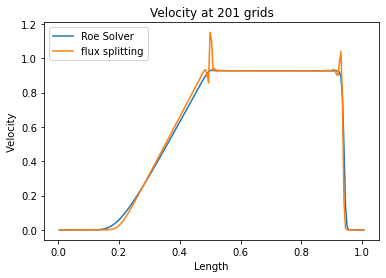

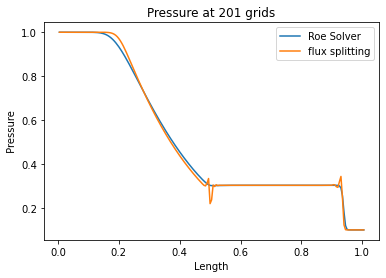

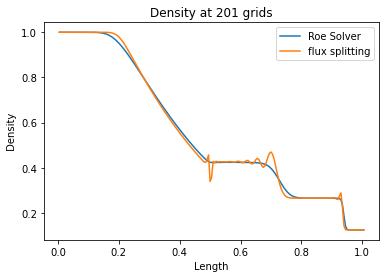

In [48]:
figure(1)
title("Velocity at {} grids" .format(round(imax,3)))
plot(X,u_plt1[:,0])
plot(X,u_plt2[:,0])
xlabel("Length") 
ylabel(" Velocity ")
legend(["Roe Solver","flux splitting"])
savefig("Velocity at {} grids" .format(round(imax,3)))
figure(2)
title("Pressure at {} grids" .format(round(imax,3)))
plot(X,P_plt1[:,0])
plot(X,P_plt2[:,0])
xlabel("Length") 
ylabel(" Pressure ")
legend(["Roe Solver","flux splitting"])
savefig("Pressure at {} grids" .format(round(imax,3)))
figure(3)
title("Density at {} grids" .format(round(imax,3)))
plot(X,rho_plt1[:,0])
plot(X,rho_plt2[:,0])
xlabel("Length") 
ylabel(" Density ")
legend(["Roe Solver","flux splitting"])
savefig("Density at {} grids" .format(round(imax,3)))